In [7]:
#importing and installing dependencies
# !pip install tensorflow tensorflow-datasets ipywidgets tensorflow-gpu

In [2]:
#seting tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [11]:
#importing libraries
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [4]:
#tensorflow api to load fashion mnist dataset
ds = tfds.load('fashion_mnist', split = 'train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Anuj Bohra\tensorflow_datasets\fashion_mnist\3.0.1.incompleteA3CK8Y\fashion_mnist-train.tfr…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Anuj Bohra\tensorflow_datasets\fashion_mnist\3.0.1.incompleteA3CK8Y\fashion_mnist-test.tfre…

Dataset fashion_mnist downloaded and prepared to C:\Users\Anuj Bohra\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [10]:
ds.as_numpy_iterator().next()['label']

2

In [14]:
#setup connection iterator i.e. converting tf datasets into numpy array
dataiterator = ds.as_numpy_iterator()

In [16]:
#getting data from the pipeline
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 59],
         [ 77],
         [ 58],
         [ 56],
         [ 58],
         [ 57],
         [ 65],
         [ 89],
         [  2],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [245],
         [213],
         [199],
         [192],
         [188],
         [189],
         [184],
         [226],
         [ 90],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

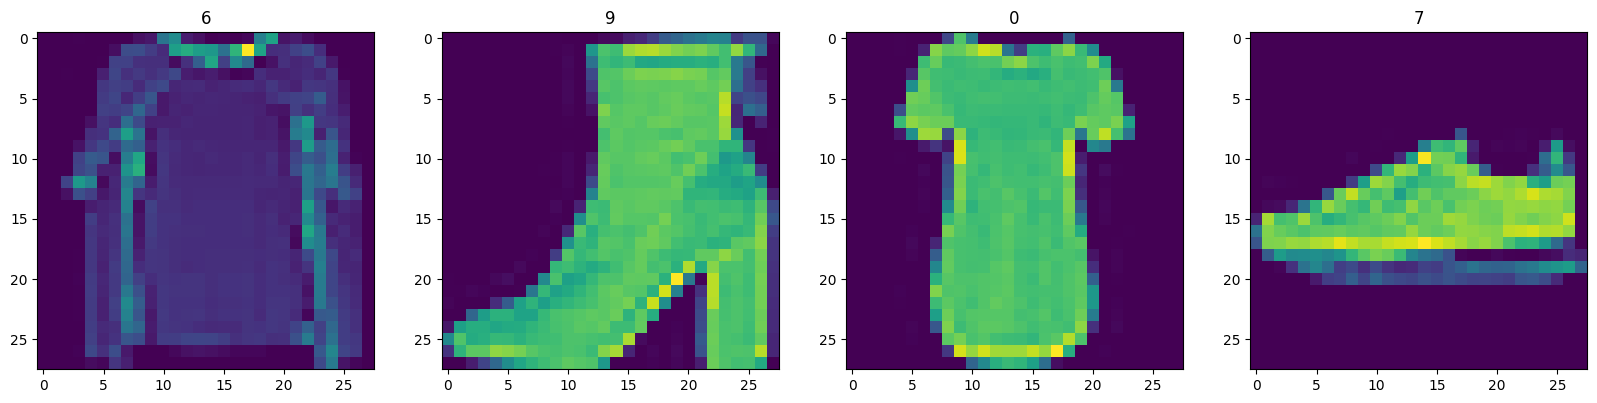

In [20]:
#setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize =(20,20))
for idx in range(4):
    #grab an image and label
    sample = dataiterator.next()
    #plot the image using specific subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    #appending the image label as plot title
    ax[idx].title.set_text(sample['label'])

In [21]:
#scaling the images
def scale_images(data):
    image = data['image']
    return image/255

In [22]:
#reload the dataset
ds = tfds.load('fashion_mnist',split='train')
#running the dataset through the sscale_images preprocessing step
ds =ds.map(scale_images) 
#cache the dataset for that batch in meory to improve training speed
ds = ds.cache()
#shuffling the dataset
ds = ds.shuffle(60000)
#grouping the dataset into 128 images per sample
ds = ds.batch(128)
#reducing the likelihood of bottlenecking
ds = ds.prefetch(64)

In [23]:
# output
# 128 - batch size
# 28 - width
# 28 - height
# 1 - grescale image
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

### Build Neural Network

In [34]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [44]:
#Generator

def build_generator():
  model = Sequential()
  
  model.add(Dense(7*7*128, input_dim=128))  # 128 random inputs to 7*7*128 shape
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7, 7, 128)))  # reshaping
  
  # Upsampling block 1
  model.add(UpSampling2D())  # doubles the size of output from above layer
  model.add(Conv2D(128, 5, padding='same'))  # condense the input to get some parameters
  model.add(LeakyReLU(0.2))
  
  # Upsampling block 2
  model.add(UpSampling2D())  # Doubles the size of output
  model.add(Conv2D(128, 5, padding='same'))  # condense the input to get some parameters
  model.add(LeakyReLU(0.2))
  
  # Downsampling block 1
  model.add(Conv2D(128, 4, padding='same'))  # condense the input to get some parameters
  model.add(LeakyReLU(0.2))
  
  # Downsampling block 2 
  model.add(Conv2D(128, 4, padding='same'))  # Condense with convolution
  model.add(LeakyReLU(0.2))
  
  # Conv layer to get one channel (sigmoid for image generation)
  model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))
  
  return model

In [48]:
generator = build_generator()

In [49]:
generator.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6272)              809088    
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_2 (UpSampling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                      

In [71]:
img = generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 107ms/step


In [72]:
img.shape

(4, 28, 28, 1)

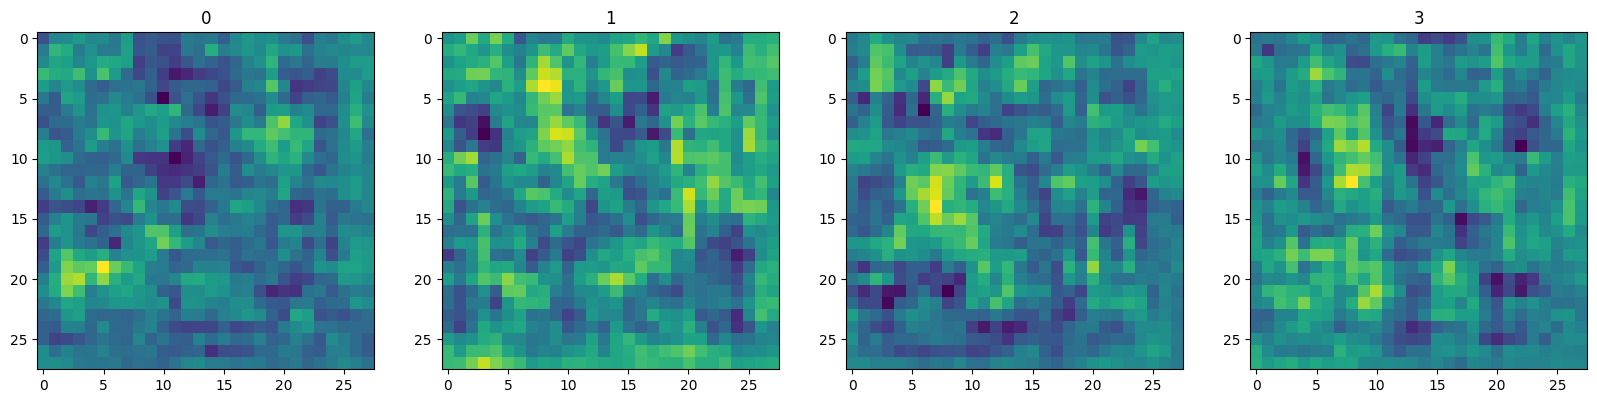

In [52]:
#generate random image
img = generator.predict(np.random.randn(4,128,1))
#setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize =(20,20))
for idx,img in enumerate(img):
    #plot the image using specific subplot
    ax[idx].imshow(np.squeeze(img))
    #appending the image label as plot title
    ax[idx].title.set_text(idx)

In [64]:
#discriminator
def build_discriminator():
    model = Sequential()
    #1st conv block
    model.add(Conv2D(32,5,input_shape= (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4)) #harder for discriminator to learn applies regularisation
    
    # 2nd conv block
    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # 3rd conv block
    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # 4th conv block
    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))
    
    
    return model

In [65]:
discriminator = build_discriminator()

In [66]:
discriminator.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_9 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 16, 16, 128)     

In [73]:
img.shape

(4, 28, 28, 1)

In [74]:
discriminator.predict(img)

1/1 [==============================] - 0s 65ms/step


array([[0.5038318],
       [0.5039015],
       [0.5037079],
       [0.5035843]], dtype=float32)

### Training Loop

In [76]:
#losses and optimisers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [77]:
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate = 0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [78]:
#importing the base model to subclass
from tensorflow.keras.models import Model

In [99]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
        # attributes for gen and dis
        self.generator = generator
        self.discriminator = discriminator
        
    def compile(self, g_opt,d_opt,g_loss,d_loss,*args, **kwargs):
        super().compile(*args, **kwargs)
        
        #attributes for loss and opt
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss
    def train_step(self, batch):
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        #train the discriminator
        with tf.GradientTape() as d_tape:
            #pass the real and fake images to discriminator 
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            
            #create labels for real and fake images
            y_realfake =tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_real)],axis=0)
             
            #add some noise to the outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake+= tf.concat([noise_real,noise_fake], axis=0)
            
            #calculate loss
            total_d_loss = self.d_loss(y_realfake,yhat_realfake)
            
            #apply backpropogation
            
            dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
            self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
            
            
            # Train the generator 
            with tf.GradientTape() as g_tape: 
                # Generate some new images
                gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

                # Create the predicted labels
                predicted_labels = self.discriminator(gen_images, training=False)

                # Calculate loss - trick to training to fake out the discriminator
                total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
            # Apply backprop
            ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
            self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

            return {"d_loss":total_d_loss, "g_loss":total_g_loss}



In [100]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)

In [101]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

### Build Callback - function that gets executed at specific stages during model building process

In [102]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [103]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join(r"C:\Users\Anuj Bohra\Desktop\GANImages", f'generated_img_{epoch}_{i}.png'))

In [ ]:
#training
hist = fashgan.fit(ds,epochs = 20, callbacks =[ModelMonitor()])

Epoch 1/20
 16/469 [>.............................] - ETA: 4:42:08 - d_loss: 0.6903 - g_loss: 0.6837

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

In [ ]:
generator.load_weights(os.path.join('archive', 'generatormodel.h5'))

In [ ]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4): 
    for c in range(4): 
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [ ]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')